<a href="https://colab.research.google.com/github/MartinParafita/BotFinanciero/blob/main/ProyectoAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import os
import platform
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
if os.access('BTCUSDT-30m-2022-07.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://github.com/MartinParafita/BotFinanciero/blob/main/BTCUSDT-30m-2022-07.csv > BTCUSDT-30m-2022-07.csv
    else:
        !wget BTCUSDT-30m-2022-07.csv https://github.com/MartinParafita/BotFinanciero/blob/main/BTCUSDT-30m-2022-07.csv
#https://github.com/MartinParafita/BotFinanciero/blob/main/BTCUSDT-30m-2022-07.csv

--2022-10-10 20:58:55--  http://btcusdt-30m-2022-07.csv/
Resolving btcusdt-30m-2022-07.csv (btcusdt-30m-2022-07.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘btcusdt-30m-2022-07.csv’
--2022-10-10 20:58:55--  https://github.com/MartinParafita/BotFinanciero/blob/main/BTCUSDT-30m-2022-07.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘BTCUSDT-30m-2022-07.csv’

BTCUSDT-30m-2022-07     [ <=>                ] 992.50K  --.-KB/s    in 0.05s   

2022-10-10 20:58:55 (19.9 MB/s) - ‘BTCUSDT-30m-2022-07.csv’ saved [1016320]

FINISHED --2022-10-10 20:58:55--
Total wall clock time: 0.5s
Downloaded: 1 files, 992K in 0.05s (19.9 MB/s)


In [ ]:
df= pd.read_csv("BTCUSDT-30m-2022-07.csv")
df

,1656633600000,19942.21000000,20699.99000000,19658.97000000,20491.03000000,7279.47579000,1656635399999,145615709.42360320,85501,3915.92731000,78436635.14180450,0
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999,1.605123e+08,97554,3953.10607,8.114685e+07,0
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999,5.962890e+07,38649,1546.15527,3.145089e+07,0
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999,4.712065e+07,29422,1198.41026,2.443303e+07,0
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999,3.977379e+07,26825,974.45005,1.991252e+07,0
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999,3.501123e+07,26199,824.92826,1.676177e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999,5.111222e+07,83358,986.05211,2.329466e+07,0
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999,1.247794e+08,144945,2488.94504,5.835367e+07,0
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999,1.021054e+08,136791,2142.19804,4.989353e+07,0
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999,5.636384e+07,85713,1182.71711,2.759449e+07,0


En las siguientes lineas de codigo les cambio el nombre a las columnas, no me dejó cambiarlas según su posición ( 0,1,2 ) sino que las columnas tenian como nombre el primer dato de la primer fila.

In [ ]:
df2 = df.copy()
df2.rename(columns={"1656633600000":"Open time", "19942.21000000":"Open price", "20699.99000000": "High", "19658.97000000": "Low", "20491.03000000":"Close price", "7279.47579000": "Volume", "1656635399999": "Close time"}, inplace=True)
df2

,Open time,Open price,High,Low,Close price,Volume,Close time,145615709.42360320,85501,3915.92731000,78436635.14180450,0
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999,1.605123e+08,97554,3953.10607,8.114685e+07,0
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999,5.962890e+07,38649,1546.15527,3.145089e+07,0
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999,4.712065e+07,29422,1198.41026,2.443303e+07,0
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999,3.977379e+07,26825,974.45005,1.991252e+07,0
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999,3.501123e+07,26199,824.92826,1.676177e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999,5.111222e+07,83358,986.05211,2.329466e+07,0
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999,1.247794e+08,144945,2488.94504,5.835367e+07,0
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999,1.021054e+08,136791,2142.19804,4.989353e+07,0
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999,5.636384e+07,85713,1182.71711,2.759449e+07,0


In [ ]:
df3 = df2.drop(columns={"145615709.42360320","85501","3915.92731000","78436635.14180450","0"})
df3

,Open time,Open price,High,Low,Close price,Volume,Close time
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999
...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999


In [ ]:
# Para saber que momento exacto representa:
#dia_0 = pd.Period('1970/01/01 00:00:00', 'ms')  # Numero de Open/Close time:
#dia_0


In [ ]:
cierres = df3["Close time"].apply(lambda x: pd.Period('1970/01/01 00:00:00', 'ms') + x)
cierres

0       2022-07-01 00:59:59.999
1       2022-07-01 01:29:59.999
2       2022-07-01 01:59:59.999
3       2022-07-01 02:29:59.999
4       2022-07-01 02:59:59.999
                 ...           
1482    2022-07-31 21:59:59.999
1483    2022-07-31 22:29:59.999
1484    2022-07-31 22:59:59.999
1485    2022-07-31 23:29:59.999
1486    2022-07-31 23:59:59.999
Name: Close time, Length: 1487, dtype: period[L]

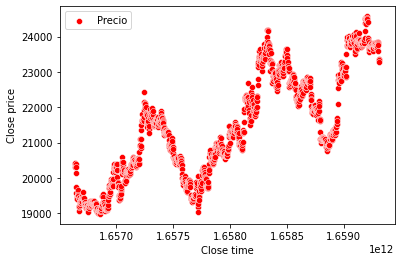

In [ ]:
sns.scatterplot(x=df3['Close time'], y=df3['Close price'], color='r', label='Precio')
plt.show()

In [ ]:
df3['Al alza'] = df3.apply(lambda x: True if x["Close price"] >= x["Open price"] else False, axis=1)
df3

,Open time,Open price,High,Low,Close price,Volume,Close time,Al alza
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999,False
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999,True
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999,True
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999,False
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999,False
...,...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999,False
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999,False
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999,True
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999,False


In [28]:
X = df3['Close time'].values
y = df3['Close price'].values


In [ ]:
y_sum = 0
for i in y:
  y_sum += i

y_sum

31887710.73999997

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Polinomio grado 3
lr= LinearRegression()
polynomial_features = PolynomialFeatures()
poly = PolynomialFeatures(degree=3)
X_train_reshape = X_train.reshape(-1,1)
X_test_reshape = X_test.reshape(-1,1)
y_train_reshape = y_train.reshape(-1,1)
X_train_poly = poly.fit_transform(X_train_reshape)
X_test_poly = poly.fit_transform(X_test_reshape)
lr.fit(X_train_poly, y_train)
y_hat = lr.predict(X_test_poly)


In [ ]:
#print(len(X_train_poly))
print(y_train_reshape.shape)

#if X.shape[0] != y.shape[0]:
  #print("X and y rows are mismatched, check dataset again")

(1040, 1)


In [ ]:
plt.figure(figsize=(14, 5))


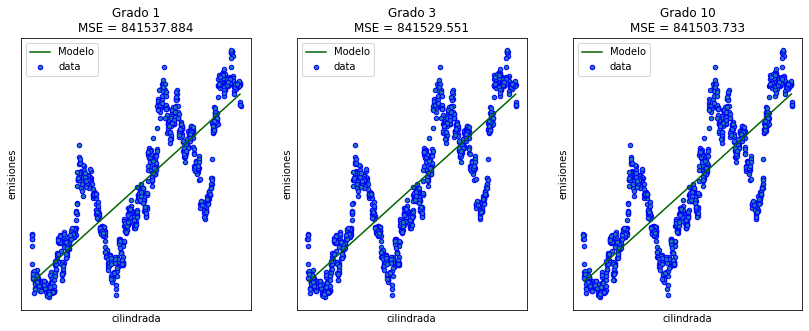

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
degrees_to_plot = [1, 3, 10]
max_dregree = max(degrees_to_plot)

plt.figure(figsize=(14, 5))
for degree in range(1, (max_dregree+1)):

    plot_number = 0
    try:
        plot_number = degrees_to_plot.index(degree) + 1
    except:
        plot_number = 0

    if plot_number > 0:
        ax = plt.subplot(1, len(degrees_to_plot), plot_number)
        plt.setp(ax, xticks=(), yticks=())

    poly = PolynomialFeatures(degree=degree)
    
    X_train_reshape = X_train.reshape(-1,1)
    X_test_reshape = X_test.reshape(-1,1)
    y_test_reshape = y_test.reshape(-1,1)
    X_train_poly = poly.fit_transform(X_train_reshape)
    X_test_poly = poly.fit_transform(X_test_reshape)

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_hat = lr.predict(X_test_poly)
    y_hat_train = lr.predict(X_train_poly)

    mse = mean_squared_error(y_test_reshape, y_hat)
    mse_train = mean_squared_error(y_train_reshape, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)

    if plot_number > 0:

        lx = sorted(X_test_reshape)
        lx_poly = poly.fit_transform(lx)
        ly = lr.predict(lx_poly)

        plt.plot(lx, ly, label="Modelo", color='darkGreen')
        plt.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
        plt.xlabel("cilindrada")
        plt.ylabel("emisiones")
        plt.legend()
        plt.title("Grado {}\nMSE = {:.3f}".format(degree, mse))

plt.show()

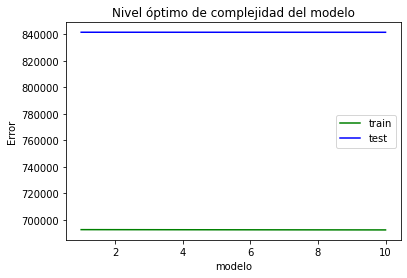

Nivel óptimo: 10


In [35]:
plt.plot(range(1, (max_dregree+1)), mse_train_list, c='g', label="train")
plt.plot(range(1, (max_dregree+1)), mse_test_list, c='b', label="test")
plt.xlabel("modelo")
plt.ylabel("Error")
plt.legend()
plt.title("Nivel óptimo de complejidad del modelo")
plt.show()
print('Nivel óptimo:', mse_test_list.index(min(mse_test_list))+1)

In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test_reshape, y_hat)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.63
